# PySeison - Tutorial 3: ADCP class

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. PySeidon - ADCP object initialisation

Similarly to the "TideGauge class" and the "Drifter class", the "ADCP class" is a measurement-based object.

### 1.1. Package importation

As any other library in *Python*, PySeidon has to be first imported before to be used. Here we will use an alternative *import* statement compared to the one previoulsy presented:  

In [2]:
from pyseidon import *

*** Star *** here means *all*. Usually this form of statements would import the entire library. In the case of *PySeidon*, this statement will import the following object classes: FVCOM, Station, Validation, ADCP, Tidegauge and Drifter. Only the ADCP class will be tackle in this tutorial. However note should note that the architecture design and functioning between each classes are very similar. 

### 1.2. Object definition

*Python* is by definition an [**object oriented language**](http://www.tutorialspoint.com/python/python_classes_objects.htm)...and so is *matlab*. *PySeidon* is based on this notion of object, so let us define our first "ADCP" object.

***Exercise 1: ***
- Unravel ADCP documentation with Ipython ***shortcuts***

***Answer: ***

In [5]:
ADCP?

According to the documentation, in order to define a ADCP object, the only required input is a ***filename**. This string input represents path to a file (e.g. *testAdcp=ADCP('./path_to_matlab_file/filename')* and whose file must be a matlab file (i.e. *.mat).

**Note** that, at the current stage, the package only handle fully processed ADCP matlab data previously quality-controlled as well as formatted through "EnsembleData_FlowFile" matlab script at the mo. All the tool necessary for this processing and quality-control can be found in *./pyseidon/utilities/BP_tools.py and save_FlowFile_BPFormat.py*. Additionally, a template for the ADCP file is provided in the package under *data4tutorial*

***Exercise 2: ***
- define a adcp object named *adcp* from the following template: **./data4tutorial/adcp_GP_01aug2013.mat**
- Tip: adapt the file's path to your local machine. 

***Answer: ***

In [3]:
adcp=ADCP('./data4tutorial/adcp_GP_01aug2013.mat')

### 1.3. Object attributes, functions, methods & special methods

The ADCP object possesses 3 attributes and 3 methods. They would appear by typing ***adcp. Tab*** for instance.

An *attribute* is a quantity intrinsic to its *object*. A *method* is an intrinsic *function* which changes an *attribute* of its object. Contrarily a *function* will generate its own *output*:

The Station attributes are:
- ***History***: history metadata that keeps track of the object changes
- ***Data***: gathers the raw/unchanged data of the specified *.mat file
- ***Variables***: gathers the hydrodynamics related data. Note that methods will generate new fields in this attribute

The Station methods & functions are:
- ***Utils***: gathers utility methods and functions for use with 2D and 3D variables
- ***Plots***: gathers plotting methods for use with 2D and 3D variables
- ***dump_profile_data***: dumps profile data (x,y) in a *.csv file.

## 2. PySeidon - Hands-on (15 mins)

### Utils

***Exercise 3: ***
- Print the (lon,lat) coordinates of the *adcp* object (hint: look into ***Variables***)
- Use ***Utils.velo_norm*** to compute the velocity norm over all time steps and all vertical levels...and accessorily plot the mean velocity vertical profile. 
- Use ***Utils.ebb_flood_split*** function to get the ebb and flood time indices of the time series.
- Plot the **flood** flow speed ***hitogram***
- Compute & Plot the **ebb** ***vertical shear***
- Perform a harmonic analysis of the velocities and print out the result
- Reconstruction these velocities based on the harmonic results of the previous question

***Answer: ***

(lon, lat) coordinates: (-66.3390666667, 44.2799166667)
solve: 
matrix prep ... 
Solution ...
diagnostics...
Done.

Lsmaj    :                            [ 1.92087736]
Lsmaj_ci :                            [ 0.02495443]
Lsmin    :                            [ 0.02102549]
Lsmin_ci :                            [ 0.01190183]
aux      : frq     :                             [ 0.0805114]
lat     :                            44.2799166667
lind    :                                     [47]
opt     : cnstit      :                                     auto
conf_int    :                                     True
diagnminsnr :                                        2
diagnplots  :                                        0
equi        :                                    False
gwchlint    :                                    False
gwchnone    :                                    False
infer       :                                       []
inferaprx   :                                        0
linci  

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


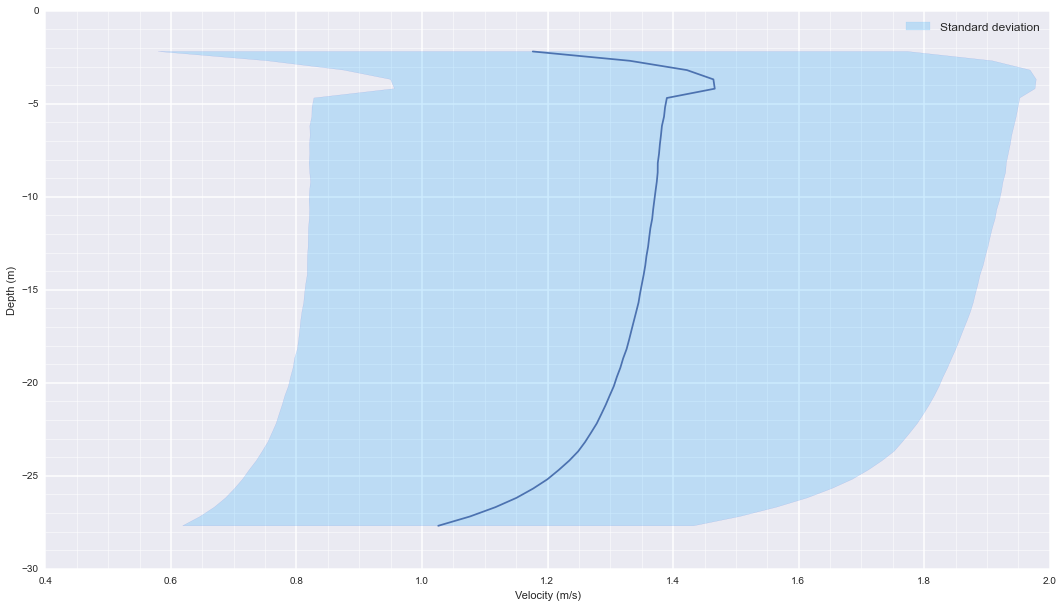

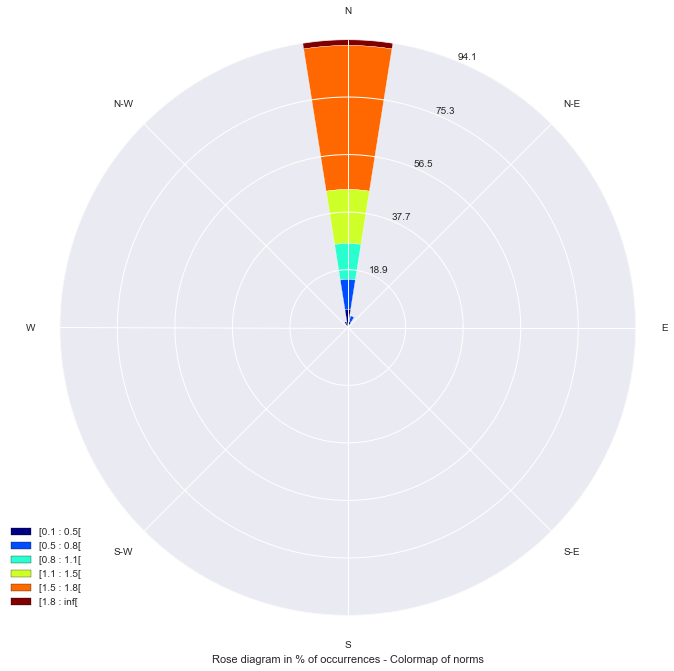

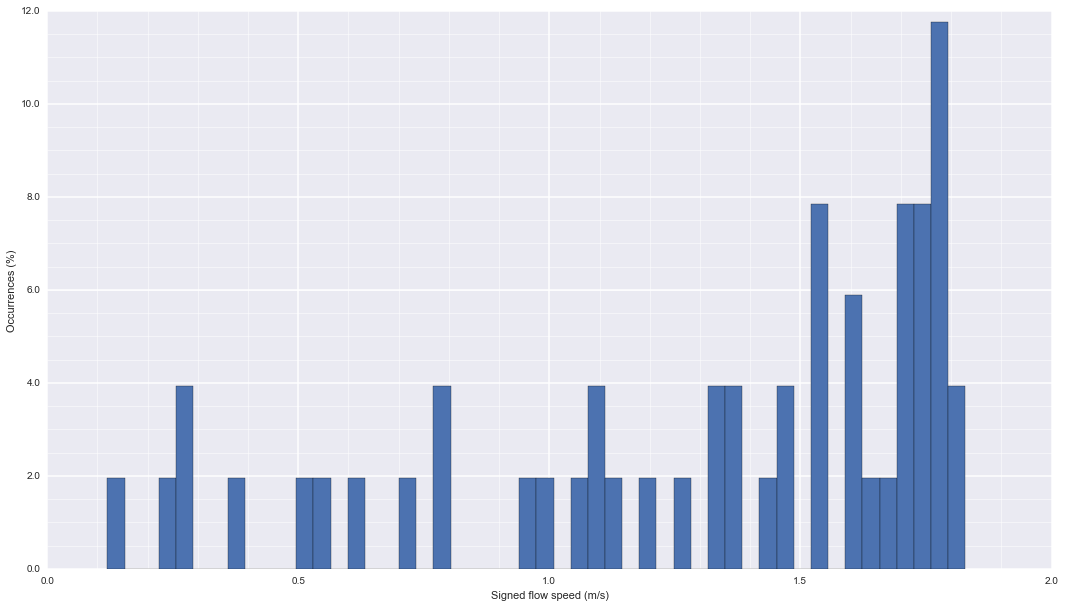

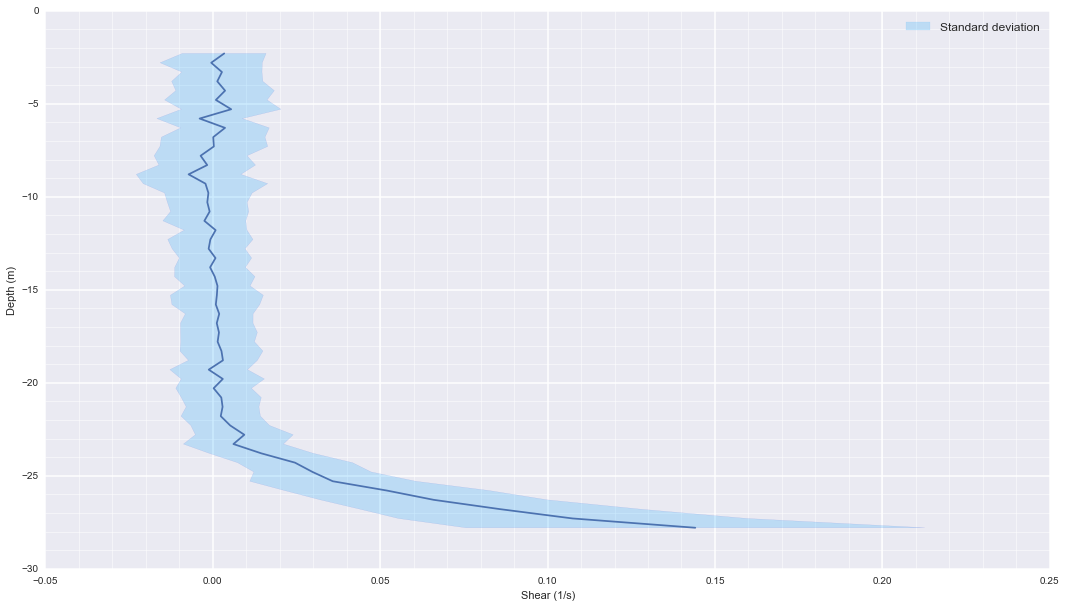

In [4]:
print "(lon, lat) coordinates: ("+str(adcp.Variables.lon)+", "+str(adcp.Variables.lat)+")"
vel = adcp.Utils.velo_norm()
fI, eI, pa, pav = adcp.Utils.ebb_flood_split()
adcp.Utils.speed_histogram(time_ind=fI)
dveldz = adcp.Utils.verti_shear(time_ind=eI)
harmo = adcp.Utils.Harmonic_analysis(elevation=False, velocity=True)
print harmo
velos = adcp.Utils.Harmonic_reconstruction(harmo)

### Save functions

***Exercise 5: ***
- ***Dump*** depth-averaged velocity and time step data in a *.csv file
- ***Hint:*** use numpy for averaging

***Answer: ***

In [7]:
import numpy as np
da_vel = np.nanmean(vel,axis=1)
station.dump_profile_data(adcp.Variables.matlabTime[:], da_vel, title='flow_speed_time_series', xlabel='matlab time', ylabel='speed')

## 4. Bug patrol & steering committee

### 4.1. Bug report

As beta tester, your first assignement is to report bugs...yet not everything is a bug. The first thing to check before to report a bug is to verify that your version of *PySeidon* is up-to-date. The best way to keep up with the package evolution is to [***git***](http://git-scm.com/) to ***clone*** the repository, use ***pull*** to update it and ***re-install*** it if needed. 

The second thing to check before to report a bug is to verify that the bug is ***reproducible***. When running into a bug, double check that your inputs fit the description of the documentation then turn the ***debug flag on*** (e.g. *output = adcpobject.function(inputs, debug=True)*) and submit the command again. If the error re-occurs then report it (i.e. copy entire error message + command and send it to package administrator)

### 4.2. Suggestions & critics

Your second role as beta-tester is to submit suggestions and critics to the developpers regarding the functioning and functionality of the package. Beta testing phase is the best opportunity to steer a project towards the applications you would like to be tackled...